Maximum number of connections agents can have: [5, 12, 3, 25, 9, 10, 6, 20, 20, 8, 7, 15, 16, 30, 3, 5, 20, 3, 10, 20, 20, 40, 10, 10, 8, 45, 8, 5, 6, 9, 35, 30, 10, 5, 15, 3, 40, 25, 40, 10, 15, 5, 16, 30, 6, 40, 17, 25, 8, 30, 50, 20, 20, 4, 10, 6, 12, 15, 30, 20, 7, 6, 7, 30, 50, 25, 25, 10, 15, 5, 30, 5, 6, 15, 15]
Residual of number of connections: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 7, 31, 6, 7, 0, 0, 0, 6, 0, 0, 0, 0]
Final connectivity matrix: 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


/home/dvlindijer/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/dvlindijer/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/dvlindijer/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/dvlindijer/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

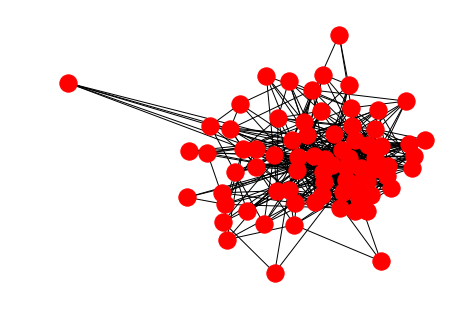

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 
import collections

N = 75 # Number of agents
C = np.zeros((N,N)) # Connectivity matrix

# The value at index i of this array indicates how many connections agent i can still make. Ideally, when the network has been
# made this array contains only zeros again. Most likely there will be some mismatch due to people inconsistent number of friends
available_connections = [5, 12, 3, 25, 9, 10, 6, 20, 20, 8, 7, 15, 16, 30, 3, 5, 20, 3, 10, 20, 20, 40, 10, 10, 8, 45, 8, 5, 6, 9, 35, 30, 10, 5, 15, 3, 40, 25, 40, 10, 15, 5, 16, 30, 6, 40, 17, 25, 8, 30, 50, 20, 20, 4, 10, 6, 12, 15, 30, 20, 7, 6, 7, 30, 50, 25, 25, 10, 15, 5, 30, 5, 6, 15, 15]


# # Sample number of connections for each agent
# for i in range(0, N): 
#     available_connections[i] = int(random.randint(0, 6)) # At this time it's random, should actually be taken from distribution
    
print('Maximum number of connections agents can have:', available_connections)

# We loop through the agents and set the number of connections to what it should be (if possible)
for i in range(0, N): 
    
    # a is a list of agents that can still be used to make a connection with
    a = [] 
    for j in range(0, N):
        if available_connections[j] > 0 and i != j and C[i,j] == 0:
            a.append(j)
            
    # From the list of available agents a random agent is chosen to make a connection with. Next, the connectivity matrix
    # is updated (symmetrically), the chosen agent is removed from the possible connection list (because one cannot connect to
    # the same agent more than once) and the number of connections of the chosen agent is reduced by one
    for k in range(0, int(available_connections[i])):
        if np.size(a) > 0:   
            connect_with = np.random.choice(a, 1)
            C[i, connect_with] = 1
            C[connect_with, i] = 1
            a.remove(connect_with)
            available_connections[int(connect_with)] -= 1
        else:
            k -= 1
            break
            
    # The number of connections agent i has made is now changed. If it was able to connect to the desired amount of other
    # agents this value is zero. If it could not make all the connections it desired this value is greater than 0.
    if available_connections[i] > 0:
        available_connections[i] -= k + 1    

    
print('Residual of number of connections:', available_connections) # Residual of available connections
print('Final connectivity matrix: \n', C) # Final connectivity matrix

# Plot the network
G = nx.from_numpy_matrix(C)
nx.draw(G)
plt.show()

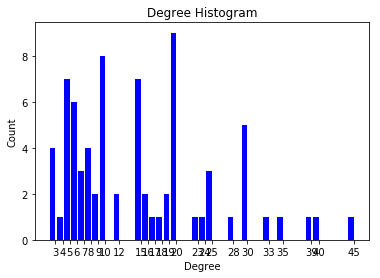

In [10]:
def graph_to_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree().items()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show()
    
graph_to_histogram(G)